In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [26]:
# csv not in repo, go to https://www.kaggle.com/zalando-research/fashionmnist
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')
fashion_mnist_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/fashion-mnist_train.csv'

In [3]:
fashion_mnist_df.shape

(60000, 785)

In [4]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

In [5]:
fashion_mnist_df.shape

(18000, 785)

In [6]:
LOOKUP = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [10]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [11]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

Actual label:  Sneaker


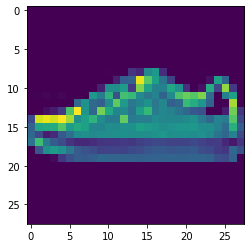

In [14]:
display_image(X.loc[567].values, Y.loc[567])

In [15]:
X = X/255.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.090196,0.717647,0.541176,0.631373,0.176471,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098039,...,0.737255,0.835294,0.325490,0.000000,0.003922,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.356863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415686,...,0.760784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.435294,0.400000,0.352941,0.019608,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [24]:
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    accuracy_count = accuracy_score(y_test, y_pred, normalize=False)
    
    precision = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    
    print('test data count:', len(y_test))
    print('accuracy:', accuracy)
    print('precision:', precision)
    print('recall:', recall)
    print('accuracy_count:', accuracy_count)
    print()

In [20]:
logistic_model = LogisticRegression(solver='sag', multi_class = 'auto', max_iter = 10000).fit(x_train, y_train)

In [25]:
y_pred = logistic_model.predict(x_test)

summarize_classification(y_test, y_pred)

test data count: 3600
accuracy: 0.8380555555555556
precision: 0.8387616680403089
recall: 0.8380555555555556
accuracy_count: 3017

